### 비지도 학습 예제 2
### 와인 품질 데이터로 클러스터링을 활용한 품질 분류

In [39]:
# 필요한 라이브러리 호출
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [40]:
# 데이터 로드
data = pd.read_csv('winequality-red.csv')

In [41]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [54]:
# 주요 특성(와인의 화학적 특성)선택
features = data.drop('quality', axis=1)

In [55]:
# 데이터 정규화
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [56]:
# k = 3 으로 클러스터링
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_features)

KMeans(n_clusters=3, random_state=42)

In [57]:
# 클러스터 레이블 데이터프레임에 추가
data['Cluster'] = kmeans.labels_

In [58]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Cluster
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [60]:
# 클러스터 품질 해석
# quality에 따른 클러스터 별 평균값 비교
cluster_means = data.groupby('Cluster').mean()
quality_clu_means = data.groupby('Cluster')['quality'].mean()

In [61]:
print('클러스터 별 평균')
print(cluster_means)

클러스터 별 평균
         fixed acidity  volatile acidity  citric acid  residual sugar  \
Cluster                                                                 
0             7.532480          0.695536     0.120592        2.460400   
1             7.595855          0.407850     0.284870        2.370812   
2            10.626076          0.438304     0.488557        2.909114   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
Cluster                                                                   
0         0.084130            16.156000             49.707200  0.996507   
1         0.075762            17.380829             47.932642  0.995842   
2         0.109904            13.222785             39.194937  0.998452   

               pH  sulphates    alcohol   quality  
Cluster                                            
0        3.369344   0.594320  10.182427  5.334400  
1        3.348791   0.657927  10.692689  5.841105  
2        3.163747   0.759468  10.408270 

In [62]:
print('quality에 따른 cluster별 평균값')
print(quality_clu_means)

quality에 따른 cluster별 평균값
Cluster
0    5.334400
1    5.841105
2    5.812658
Name: quality, dtype: float64


In [63]:
#PCA를 사용해 데이터 축소
pca = PCA(n_components=2)
features_pca = pca.fit_transform(scaled_features)

In [64]:
type(features_pca)

numpy.ndarray

In [65]:
print(features_pca)

[[-1.92549154  1.33841374]
 [-1.18303261  2.29555588]
 [-1.08015803  1.62814159]
 ...
 [-1.1488084  -1.04573193]
 [-2.43391522  0.56712192]
 [-0.03431081 -1.84149838]]


C:\Users\user\AppData\Local\Temp\ipykernel_11092\3668417669.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


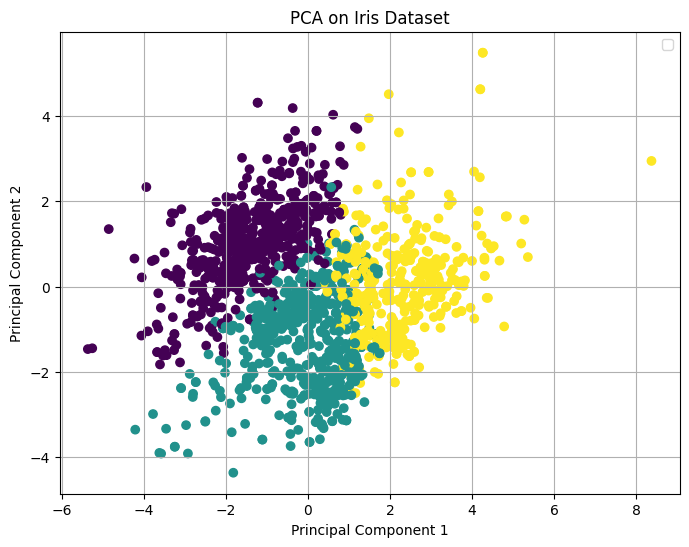

In [66]:
# PCA시각화
plt.figure(figsize=(10, 6))
for c in range(3):
    plt.scatter(features_pca[:, 0], features_pca[:, 1], c=data['Cluster'])
plt.title('PCA on Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()
plt.show()